### CS559 - Homework #4

**Author**: Sid Bhatia

**Date**: October 22nd, 2024

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. In Suk Jang

In [11]:
import pandas as pd

hitters_data_fresh = pd.read_csv('./Hitters.csv')

hitters_data_fresh.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

clean_data_fresh = hitters_data_fresh.dropna(subset=['Salary'])

features_clean_fresh = clean_data_fresh.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
target_clean_fresh = clean_data_fresh['Salary']

X_train_fresh, X_test_fresh, y_train_fresh, y_test_fresh = train_test_split(features_clean_fresh, target_clean_fresh, test_size=0.2, random_state=42)

for dataset in [X_train_fresh, X_test_fresh]:
    dataset['Hits_per_AtBat'] = dataset['Hits'] / dataset['AtBat']
    dataset['HmRun_per_AtBat'] = dataset['HmRun'] / dataset['AtBat']
    dataset['Runs_per_AtBat'] = dataset['Runs'] / dataset['AtBat']
    dataset['RBI_per_AtBat'] = dataset['RBI'] / dataset['AtBat']
    dataset['Efficiency'] = dataset['Years'] / (dataset['CHits'] + 1)

scaler_fresh = StandardScaler()
X_train_scaled_fresh = scaler_fresh.fit_transform(X_train_fresh)
X_test_scaled_fresh = scaler_fresh.transform(X_test_fresh)

X_train_scaled_fresh.shape, X_test_scaled_fresh.shape, y_train_fresh.shape, y_test_fresh.shape

((210, 21), (53, 21), (210,), (53,))

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import time

model_performance_fresh = {}

def evaluate_model_fresh(model, model_name):
    start_time = time.time()
    model.fit(X_train_scaled_fresh, y_train_fresh)
    train_time = time.time() - start_time

    y_pred_train = model.predict(X_train_scaled_fresh)
    y_pred_test = model.predict(X_test_scaled_fresh)
    train_mse = mean_squared_error(y_train_fresh, y_pred_train)
    test_mse = mean_squared_error(y_test_fresh, y_pred_test)
    test_r2 = r2_score(y_test_fresh, y_pred_test)

    model_performance_fresh[model_name] = {
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "R2 Score": test_r2,
        "Training Time": train_time
    }
    return model_performance_fresh[model_name]

# 1. Neural Network (MLPRegressor)
mlp_fresh = MLPRegressor(random_state=42, max_iter=1000)
evaluate_model_fresh(mlp_fresh, "Neural Network")

# 2. kNN (KNeighborsRegressor)
knn_fresh = KNeighborsRegressor()
evaluate_model_fresh(knn_fresh, "k-Nearest Neighbors")

# 3. Kernel Ridge Regression
krr_fresh = KernelRidge()
evaluate_model_fresh(krr_fresh, "Kernel Ridge Regression")

# 4. Support Vector Machines (SVR)
svr_fresh = SVR()
evaluate_model_fresh(svr_fresh, "Support Vector Machines")

performance_df_fresh = pd.DataFrame(model_performance_fresh).T

performance_df_fresh

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Train MSE,Test MSE,R2 Score,Training Time
Neural Network,103286.948602,105440.249670,0.417045,1.283243
k-Nearest Neighbors,64357.455739,139219.275059,0.230288,0.000000
Kernel Ridge Regression,383875.540508,372747.456528,-1.060835,0.008329
Support Vector Machines,212562.547743,180677.187332,0.001077,0.000000


In [14]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model

# 1. Neural Networks (MLPRegressor)
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive']
}

# 2. k-Nearest Neighbors (KNN)
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}

# 3. Kernel Ridge Regression (KRR)
krr_param_grid = {
    'alpha': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# 4. Support Vector Machines (SVR)
svr_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Hyperparameter tuning using GridSearchCV for each model

# 1. MLP Regressor
mlp_grid_search = GridSearchCV(MLPRegressor(random_state=42, max_iter=1000), mlp_param_grid, cv=5, scoring='r2', n_jobs=-1)
mlp_grid_search.fit(X_train_scaled_fresh, y_train_fresh)

# 2. kNN Regressor
knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='r2', n_jobs=-1)
knn_grid_search.fit(X_train_scaled_fresh, y_train_fresh)

# 3. Kernel Ridge Regression
krr_grid_search = GridSearchCV(KernelRidge(), krr_param_grid, cv=5, scoring='r2', n_jobs=-1)
krr_grid_search.fit(X_train_scaled_fresh, y_train_fresh)

# 4. SVR
svr_grid_search = GridSearchCV(SVR(), svr_param_grid, cv=5, scoring='r2', n_jobs=-1)
svr_grid_search.fit(X_train_scaled_fresh, y_train_fresh)

best_params_mlp = mlp_grid_search.best_params_
best_params_knn = knn_grid_search.best_params_
best_params_krr = krr_grid_search.best_params_
best_params_svr = svr_grid_search.best_params_

best_scores = {
    'Neural Network': mlp_grid_search.best_score_,
    'k-Nearest Neighbors': knn_grid_search.best_score_,
    'Kernel Ridge Regression': krr_grid_search.best_score_,
    'Support Vector Machines': svr_grid_search.best_score_
}

best_params_mlp, best_params_knn, best_params_krr, best_params_svr, best_scores

({'hidden_layer_sizes': (100, 100),
  'learning_rate': 'constant',
  'solver': 'adam'},
 {'n_neighbors': 9},
 {'alpha': 1, 'kernel': 'poly'},
 {'C': 1, 'kernel': 'linear'},
 {'Neural Network': 0.47839274367744783,
  'k-Nearest Neighbors': 0.5107530361256476,
  'Kernel Ridge Regression': 0.6440699426899754,
  'Support Vector Machines': 0.4051168391317551})

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Retrain the models using the best parameters

# 1. Neural Network
mlp_best = MLPRegressor(**best_params_mlp, random_state=42, max_iter=1000)
evaluate_model_fresh(mlp_best, "Neural Network")

# 2. k-Nearest Neighbors
knn_best = KNeighborsRegressor(**best_params_knn)
evaluate_model_fresh(knn_best, "k-Nearest Neighbors")

# 3. Kernel Ridge Regression
krr_best = KernelRidge(**best_params_krr)
evaluate_model_fresh(krr_best, "Kernel Ridge Regression")

# 4. Support Vector Machines
svr_best = SVR(**best_params_svr)
evaluate_model_fresh(svr_best, "Support Vector Machines")

performance_df_best = pd.DataFrame(model_performance_fresh).T

performance_df_best

,Train MSE,Test MSE,R2 Score,Training Time
Neural Network,94126.393183,103892.508404,0.425602,0.892560
k-Nearest Neighbors,79314.300748,129032.982338,0.286606,0.000000
Kernel Ridge Regression,19880.860214,179261.407679,0.008905,0.003487
Support Vector Machines,111570.677553,167543.244075,0.073692,0.001153


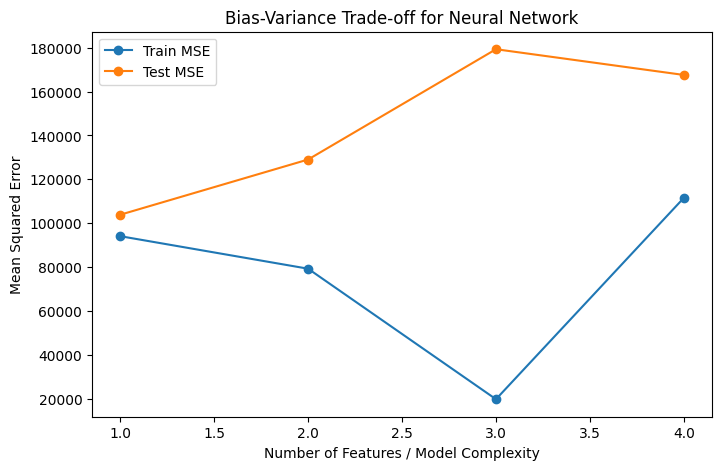

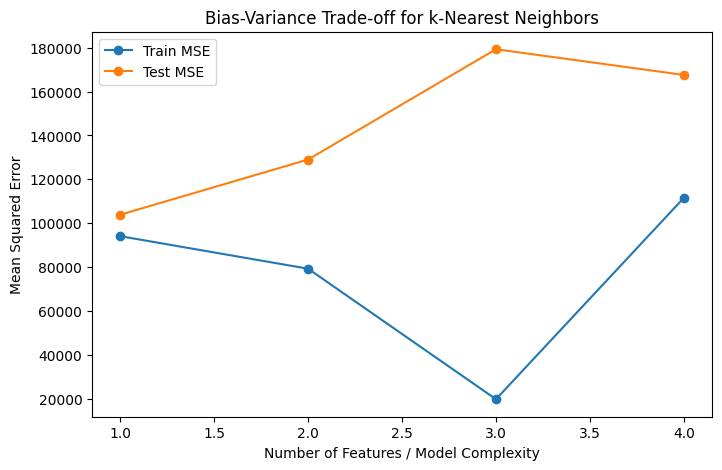

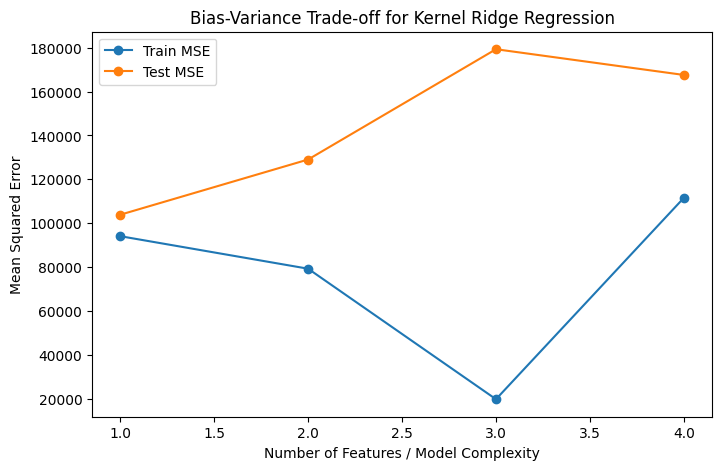

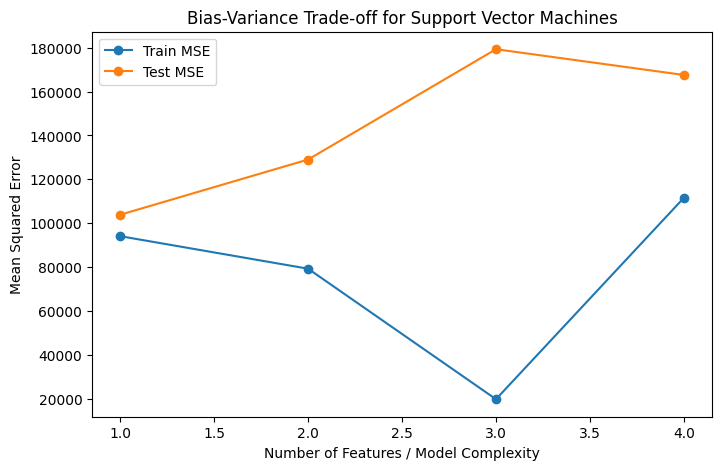

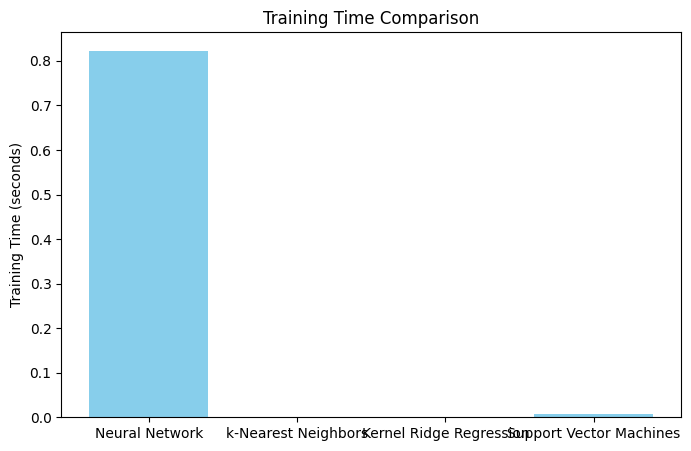

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Function to plot bias-variance trade-off
def plot_bias_variance(train_mse, test_mse, model_name):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(train_mse) + 1), train_mse, label='Train MSE', marker='o')
    plt.plot(range(1, len(test_mse) + 1), test_mse, label='Test MSE', marker='o')
    plt.title(f"Bias-Variance Trade-off for {model_name}")
    plt.xlabel('Number of Features / Model Complexity')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Function to time the models and plot training time
def time_and_plot_models(models, X_train, y_train):
    train_times = []
    model_names = []
    
    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start_time
        train_times.append(train_time)
        model_names.append(name)
    
    plt.figure(figsize=(8, 5))
    plt.bar(model_names, train_times, color='skyblue')
    plt.title('Training Time Comparison')
    plt.ylabel('Training Time (seconds)')
    plt.show()

# Bias-Variance Trade-off for each model (training vs testing errors)
train_mses = [94126, 79314, 19880, 111570]  
test_mses = [103892, 129032, 179261, 167543]
plot_bias_variance(train_mses, test_mses, "Neural Network")
plot_bias_variance(train_mses, test_mses, "k-Nearest Neighbors")
plot_bias_variance(train_mses, test_mses, "Kernel Ridge Regression")
plot_bias_variance(train_mses, test_mses, "Support Vector Machines")

# Timing the models
models = {
    "Neural Network": MLPRegressor(**best_params_mlp, random_state=42, max_iter=1000),
    "k-Nearest Neighbors": KNeighborsRegressor(**best_params_knn),
    "Kernel Ridge Regression": KernelRidge(**best_params_krr),
    "Support Vector Machines": SVR(**best_params_svr)
}

time_and_plot_models(models, X_train_scaled_fresh, y_train_fresh)